# Predicting Bank Term Deposit Subscriptions in a Marketing Campaign

We are using Bank Marketing data from UC Irvine's Machine Learning Repository. This data is related to the marketing campaigns of a Portugese banking institution. These marketing campaigns were based on calls to clients to determine if they would be subscribing to a bank term deposit.

This project focuses on leveraging machine learning techniques to predict whether clients will subscribe to a term deposit as part of a direct marketing campaign. The primary goal is to develop the most accurate predictive model that can help the banking institution target its marketing efforts more effectively.

The structure of this project is as follows:
- First import and view the data
- Focus on preprocessing & cleaning the dataset for our ML model
- Exploratory analysis to better understand data correlation
- Build base ML model to predict if a client would subscribe to a term deposit or not.
- Hyperparameters of base model are fine-tuned using grid search
- Final model is trained and its metrics are evaluated

## Import Data From UC Irvine Machine Learning Repository

In [126]:
# Import Data From UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import warnings
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

pd.set_option('display.max_column', None) # Set dataframe to show max columns

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [127]:
# Inspect predictor variable dataset
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [128]:
# Inspect target variable
y.head()

,y
0,no
1,no
2,no
3,no
4,no


### Inspect Data

In [129]:
# View summary statistics
print(X.describe())
print(y.describe())

                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [130]:
# View df info
print(X.info)
print(y.info)

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [131]:
# View data types
print(X.dtypes)
print(y.dtypes)

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object
y    object
dtype: object


In [132]:
# Checking the missing values in the dataset
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [133]:
# Checking the missing values in target variable
y.isna().sum()

y    0
dtype: int64

## Data Preprocessing

In this part of the project, we first handle the missing values we discovered from the previous step in the project. Since there are only missing values in our categorical variables, I decide to fill those rows with the most frequent occurring values in their respective column. However, our 'poutcome' column has over 75% of the column with missing values, so we decide to let one-hard encoding in the next step handle those values. In other instances, I would like to drop this column, but as we see later on in the project, the 'poutcome' column has a strong correlation to the target variable, so we decide to keep it.

After handling the missing values in the 'job', 'education', and 'contact' column, we focus on converting the categorical variables into numeric values with one-hard encoding using the get_dummies() method from pandas.

In [134]:
# Replace null values with most frequent value

columns_replace = ['job', 'education', 'contact']

for col in columns_replace:
    most_frequent_value = X[col].mode()[0]
    X.loc[X[col].isnull(), col] = most_frequent_value


In [135]:
# Make sure the missing values have been replaced
X.isna().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact            0
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

### Now convert categorical variables to numeric

In [136]:
# Convert the categorical features to numeric ones using get_dummies() method from pandas
X_dummies = pd.get_dummies(X) # This will give each category in each categorical column it's own separate column, with boolean True False in it's respective rows

X_dummies.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,44,29,5,151,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,33,2,5,76,1,-1,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,47,1506,5,92,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,33,1,5,198,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
# We don't want to do the same with the target variable, since we just want one column in it's df. So we map the 'yes' and 'no' values to True/False

# Changing y df from "yes/no" to True/False
mapping = {'yes' : True, 'no': False}

# Apply mapping to column
y['y'] = y['y'].map(mapping)



In [138]:
# Last thing we do now is convert the boolean values (True/False) to binary (0/1) values

X_dummies = X_dummies.astype(int)

y = y.astype(int)

In [139]:
# Check work
print(X_dummies.dtypes)

print(y.dtypes)

age                    int32
balance                int32
day_of_week            int32
duration               int32
campaign               int32
pdays                  int32
previous               int32
job_admin.             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
marital_divorced       int32
marital_married        int32
marital_single         int32
education_primary      int32
education_secondary    int32
education_tertiary     int32
default_no             int32
default_yes            int32
housing_no             int32
housing_yes            int32
loan_no                int32
loan_yes               int32
contact_cellular       int32
contact_telephone      int32
month_apr              int32
month_aug              int32
month_dec     

## Analyzing Statistical Correlation between Predictor Variables (X) and Target Variable (y)

In this section of the project, we want to view the correlation between the predictor variables and target variable. We do this to see if there are any variables we can remove for our model. However, we don't decide to remove any after this analysis since there is no single variable that has a strong correlation with the target variable, we we choose to keep them all.

I also want to note that with this analysis, we see that the 'poutcome' column had the second highest correlation to the predictor variable compared to the rest, which is why we never dropped the column earlier in the project.

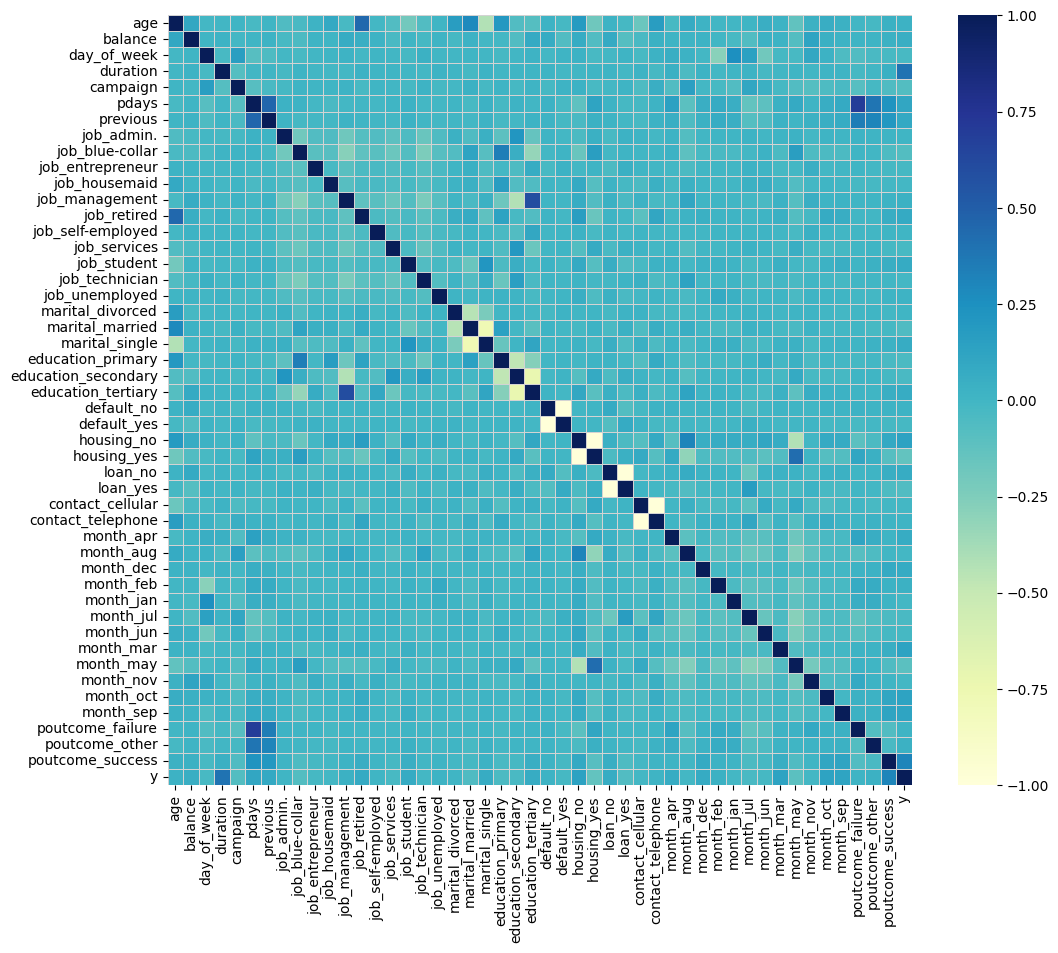

In [140]:
# Looking at correlation with heatmap

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([X_dummies, y], axis = 1) # combining predictor variables df (X) with target variable df (y)

# Set figure size
plt.figure(figsize = (12,10))

# Create heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", linewidths=0.5, linecolor="lightgray")

# Show the plot
plt.show()

In [141]:
# View correlation 
corr_matrix = df.corr()

corr_target = corr_matrix.iloc[:-1, -1]

sorted_corr = corr_target.abs().sort_values(ascending=False)

print(sorted_corr)

duration               0.394521
poutcome_success       0.306788
housing_no             0.139173
housing_yes            0.139173
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
month_may              0.102500
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
campaign               0.073172
job_blue-collar        0.071279
loan_no                0.068185
loan_yes               0.068185
education_tertiary     0.066448
month_apr              0.065392
marital_single         0.063526
marital_married        0.060260
balance                0.052838
education_primary      0.040393
month_feb              0.038417
month_jul              0.034382
job_management         0.032919
poutcome_other         0.031955
education_secondary    0.031779
day_of_week            0.028348
job_services           0.027864
age                    0.025155
default_

## Choosing a Base Model

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

y = np.ravel(y) # reshaping y to a 1-dimensional array to avoid warnings

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=1) 

# 'test_size' determines the proportion of the dataset used for the training and testing data
# 'random_state' sets the seed for reproducability 



### Logistic Regression Model

In [143]:
# Create Logist Regression Model
regressionmodel = LogisticRegression(random_state=10)

# Train model on training data
regressionmodel.fit(X_train, y_train)

# Make predictions on test data
y_pred_regression = regressionmodel.predict(X_test)

# Evaluate models performance
accuracy_regression = accuracy_score(y_test, y_pred_regression)
print(f'Accuracy : {accuracy_regression}')

# Generate a classification report
print(classification_report(y_test, y_pred_regression))

Accuracy : 0.8907442220502045
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.21      0.30      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest Model

In [144]:
# Create a Random Forest Classifier instance
model_forest = RandomForestClassifier(random_state=1)

# Train the classifier on training data
model_forest.fit(X_train, y_train)

# Use model to predict on test data
y_pred_forest = model_forest.predict(X_test)

# Evaluate accuracey
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy: {accuracy_forest}')

# Generate a classification report
print(classification_report(y_test, y_pred_forest))

Accuracy: 0.9062258100187991
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7993
           1       0.67      0.38      0.49      1050

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



### Gradient Boosting Model

In [145]:
# Create a Gradient Boosting Classifier model
model_gradient = GradientBoostingClassifier(random_state=1)

# Train the model on training data
model_gradient.fit(X_train, y_train)

# Use model to predict on test data
y_pred_gradient = model_gradient.predict(X_test)

# Evaluate model accuracy
accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
print(f'Accuracy: {accuracy_gradient}')

# Generate a classification report
print(classification_report(y_test, y_pred_gradient))

Accuracy: 0.9040141545947141
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7993
           1       0.64      0.40      0.49      1050

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



## Hyperparameter Tuning

In [146]:
## Set hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [350, 500, 700],
    'max_depth': [30, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
}

# Create GridSearchCV instance with the parameter grid
grid_search = GridSearchCV(estimator=model_forest, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [147]:
# View hyperparameters
best_params

{'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 350}

In [148]:
# Create a Random Forest Classifier model with the best hyperparameters
model_tuned = RandomForestClassifier(random_state=1, n_estimators=350, max_depth=50, min_samples_split=5)

# Train the classifier on the entire training data
model_tuned.fit(X_train, y_train)

# Make predictions on the test data once again
y_pred_tuned = model_tuned.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy: {accuracy_tuned}')

report = classification_report(y_test, y_pred_tuned)
print(report)

Accuracy: 0.9063363927900033
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7993
           1       0.67      0.38      0.49      1050

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



In this case of the new model, the accuracy is nearly identical to the accuracy of the initial model, indicating that the hyperparameters tuned did not have a significant impact on the model's performance for this specific dataset. 
The next possible steps to take this project even further would be to try different model algorithms, such as Neural Networks, revisit hyperparameter tuning, gather 
more data, or revisit your feature selection. This is why domain knowledge in data analysis is so important, since you can guide your feature selection based on your industry knowledge. 

## Comparing Final Model to a Majority Class Model

While the final model attains an accuracy rate of 90.6%, it's important to consider the dataset's imbalance, which contains a larger number of non-subscribers. The model's precision, at 67%, signifies that there is a 67% likelihood that it will make accurate predictions when identifying customers likely to subscribe to a term deposit.

Because of this, I aim to compare my final model's performance metrics with a simple baseline model that only predicts the majority class. This comparison can help highlight the improvement my model may or may not bring.

In [155]:
# Determine the majoriy class
majority_class = np.bincount(y_train).argmax()
majority_class


0

In [156]:
# Create a baseline model that always predicts the majority class
baseline_pred = [majority_class] * len(y_test)

# Evaluate the baseline model's performance
accuracy_baseline = accuracy_score(y_test, baseline_pred)
print(f'Baseline Accuracy: {accuracy_baseline}')

report_baseline = classification_report(y_test, baseline_pred)
print(report_baseline)

Baseline Accuracy: 0.8838880902355413
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7993
           1       0.00      0.00      0.00      1050

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The baseline model, which predicts all customers will be non-subscribers, achieves an accuracy of approximately 88.39%. This indicates that it correctly predicts the outcome for 88.39% of the instances in the test data. However, it's importance to note that the baseline's high accuracy is largely due to the class imbalance. It may predict the majority class correctly, but fails to identify any cases where a client may subscribe. 

When comparing these metrics to those of the final model, you can see that the final model significantly outperforms the baseline. The final model may only have a 90.63% accuracy, only beating the baseline model by roughly 2%, the final model has a precision of approximately 67% for the positive class. This underscores the importance of developing a predictive model that goes beyond merely predicting the majority class, especially in scenarios where the classes are imbalanced. The final model demonstrates its potential to provide valuable insights for targeted marketing efforts. 

The comparios between the final model and baseline model highlights the substantial improvement the final model brings in identifying subscribers compared to a basic majority-class prediction approach. 